In [1]:
# 1.0 Data Loading Code Runs At This Point
import pandas as pd

# 1.0.1
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score

# 1.0.2
from pathlib import Path

In [2]:
# 1.0.3 Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 1.1 Path to data folder:

pathToFolder = "/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv"

In [ ]:
from pathlib import Path

# Your pathToFolder
pathToFolder = "/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv"

# Construct the full path to the file
path = Path(pathToFolder) / "GOOG.csv"


In [ ]:
# 1.11 path + Filename:

path = Path(pathToFolder) / "GOOG.csv"

In [ ]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
import pandas as pd
from pathlib import Path

# Replace this with the correct path to the CSV file
csv_file_path = "/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv"

# Load the data using pandas
X = pd.read_csv(csv_file_path)


In [ ]:
# 1.3.1 About data:

X.shape   # (2000, 21)
X.head()

(1258, 8)

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,7/30/18,61.400501,61.745800,60.573502,60.987000,60.987000,36998000
1,GOOG,7/31/18,61.000500,61.379398,60.279999,60.862999,60.862999,32894000
2,GOOG,8/1/18,61.400002,61.673500,60.510502,61.000500,61.000500,31344000
3,GOOG,8/2/18,60.294998,61.493999,60.239498,61.307499,61.307499,30626000
4,GOOG,8/3/18,61.480999,61.500000,60.752998,61.185501,61.185501,21792000


In [ ]:
# 1.3.2 Data types:
X.dtypes

Name          object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# 1.2 How many unique values each column has:

for i in X.columns:
  print(i, X[i].nunique())

Name 1
Date 1258
Open 1235
High 1244
Low 1247
Close 1243
Adj Close 1243
Volume 1237


In [ ]:
# 1.5 Filter rows with missing values
X.isnull().sum().sum()

0

In [ ]:
# Identify the correct target column name
target_column_name = 'High'

# Create the target variable (y) and remove it from the features DataFrame (X)
y = X[target_column_name]
X.drop(columns=[target_column_name], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# 2.1 Split data into training and validation data, for both features and target:

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
# 3.0 A function to model and also to calculate MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 3.2 Train model
    model.fit(train_X, train_y)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load your data using pandas
data = pd.read_csv("/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv")

# Identify features and target variable
features = data.drop(columns=["High"])
target = data["High"]

# Preprocess categorical variables (example using one-hot encoding)
features_encoded = pd.get_dummies(features)

# Split data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(features_encoded, target, random_state=0)


In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae


In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")


Max leaf nodes: 5 		 Mean Absolute Error: 5.0780743685334055
Max leaf nodes: 50 		 Mean Absolute Error: 0.9444452916827414
Max leaf nodes: 500 		 Mean Absolute Error: 0.7148952481481484
Max leaf nodes: 5000 		 Mean Absolute Error: 0.715254990476191


In [2]:
!pip install --upgrade scikit-learn


In [4]:
#Reading the file
data = pd.read_csv("/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv")

In [5]:
data.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,7/30/18,61.400501,61.745800,60.573502,60.987000,60.987000,36998000
1,GOOG,7/31/18,61.000500,61.379398,60.279999,60.862999,60.862999,32894000
2,GOOG,8/1/18,61.400002,61.673500,60.510502,61.000500,61.000500,31344000
3,GOOG,8/2/18,60.294998,61.493999,60.239498,61.307499,61.307499,30626000
4,GOOG,8/3/18,61.480999,61.500000,60.752998,61.185501,61.185501,21792000


In [6]:
# Exploring the data
print("\n Shape")
data.shape


 Shape


(1258, 8)

In [7]:
print("\n\n Columns")
data.columns.values
print("\n")          # Label column is of object type



 Columns




In [9]:
# Assuming 'target_column' is the actual name of the column containing the target variable
target_distribution = data['High'].value_counts()
print("Target distribution:")
print(target_distribution)


Target distribution:
92.360001     2
60.000000     2
74.500000     2
58.930500     2
59.803001     2
             ..
56.342999     1
56.484501     1
58.765499     1
57.581501     1
134.070007    1
Name: High, Length: 1244, dtype: int64


In [10]:
print("\n\nData types")
data.dtypes.value_counts()



Data types


float64    5
object     2
int64      1
dtype: int64

In [11]:
print("\n")
data.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,7/30/18,61.400501,61.745800,60.573502,60.987000,60.987000,36998000
1,GOOG,7/31/18,61.000500,61.379398,60.279999,60.862999,60.862999,32894000
2,GOOG,8/1/18,61.400002,61.673500,60.510502,61.000500,61.000500,31344000
3,GOOG,8/2/18,60.294998,61.493999,60.239498,61.307499,61.307499,30626000
4,GOOG,8/3/18,61.480999,61.500000,60.752998,61.185501,61.185501,21792000


In [12]:
# Examine data statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,91.973059,93.054638,90.990803,92.037102,92.037102,3.028891e+07
std,30.121125,30.426567,29.803006,30.102464,30.102464,1.313858e+07
min,48.695000,50.176998,48.505501,48.811001,48.811001,6.936000e+06
25%,61.969250,62.424875,61.412499,61.972376,61.972376,2.193050e+07
50%,89.306748,90.427498,88.194999,89.223247,89.223247,2.705800e+07
75%,116.868702,118.794874,115.958061,117.438749,117.438749,3.417298e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


DATA VISUALISATION

In [13]:
data.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,GOOG,7/30/18,61.400501,61.745800,60.573502,60.987000,60.987000,36998000
1,GOOG,7/31/18,61.000500,61.379398,60.279999,60.862999,60.862999,32894000
2,GOOG,8/1/18,61.400002,61.673500,60.510502,61.000500,61.000500,31344000
3,GOOG,8/2/18,60.294998,61.493999,60.239498,61.307499,61.307499,30626000
4,GOOG,8/3/18,61.480999,61.500000,60.752998,61.185501,61.185501,21792000


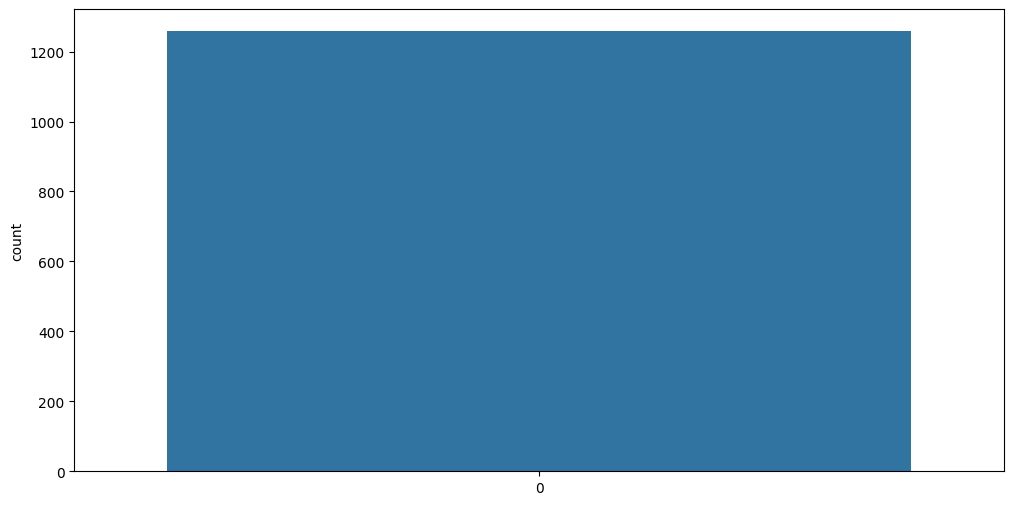

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data['High'])
plt.show()


In [18]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
#from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1.1.7
from sklearn.datasets import make_classification

In [19]:
# 1.2 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
# 2.0 Get iris dataset
data = load_iris()
type(data)    # sklearn.utils.Bunch
              # 'Bunch' is a dict that supports
              #  attribute-style access

sklearn.utils._bunch.Bunch

In [21]:
# 2.1
X = data['data']
y = data['target']
col_names = data.feature_names
target_name = data.target_names


In [22]:
# 2.1.2
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
# 2.2 Create a DataFrame
iris = pd.DataFrame(X,columns=col_names)
iris['target'] = y

In [24]:
# 2.3 Explore data:
iris.head()
print()
iris.shape   # (150, 5)
print()
iris.dtypes
print("\n\n---Distribution of target value ---\n")
iris['target'].value_counts()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object



---Distribution of target value ---



0    50
1    50
2    50
Name: target, dtype: int64

In [25]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [26]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:

X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(105, 4)

(45, 4)

In [27]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [28]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [30]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.9555555555555556

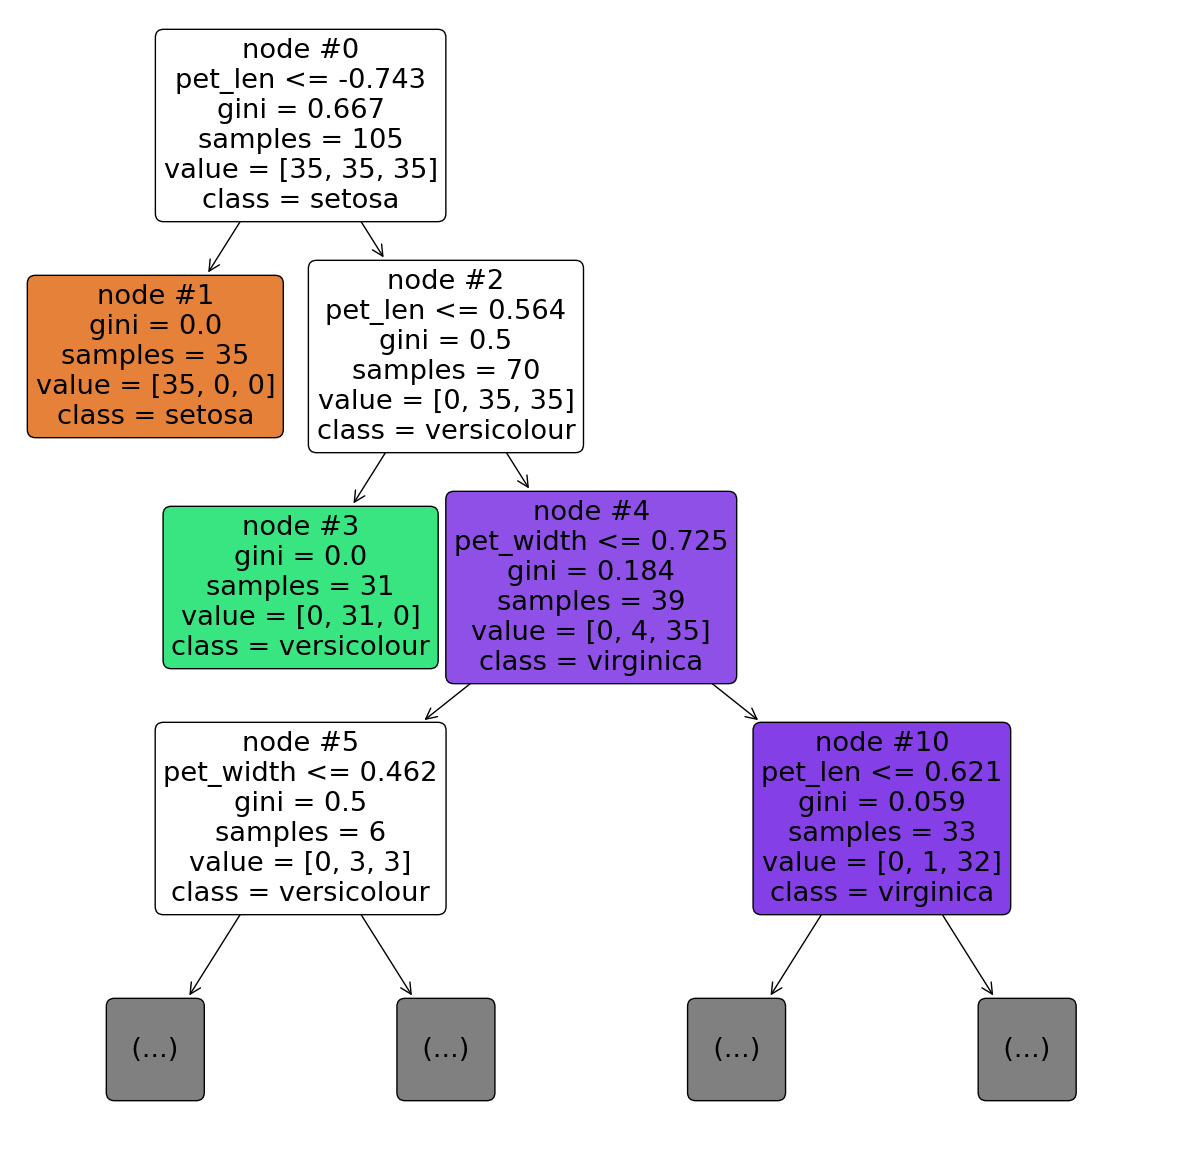

In [31]:

_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

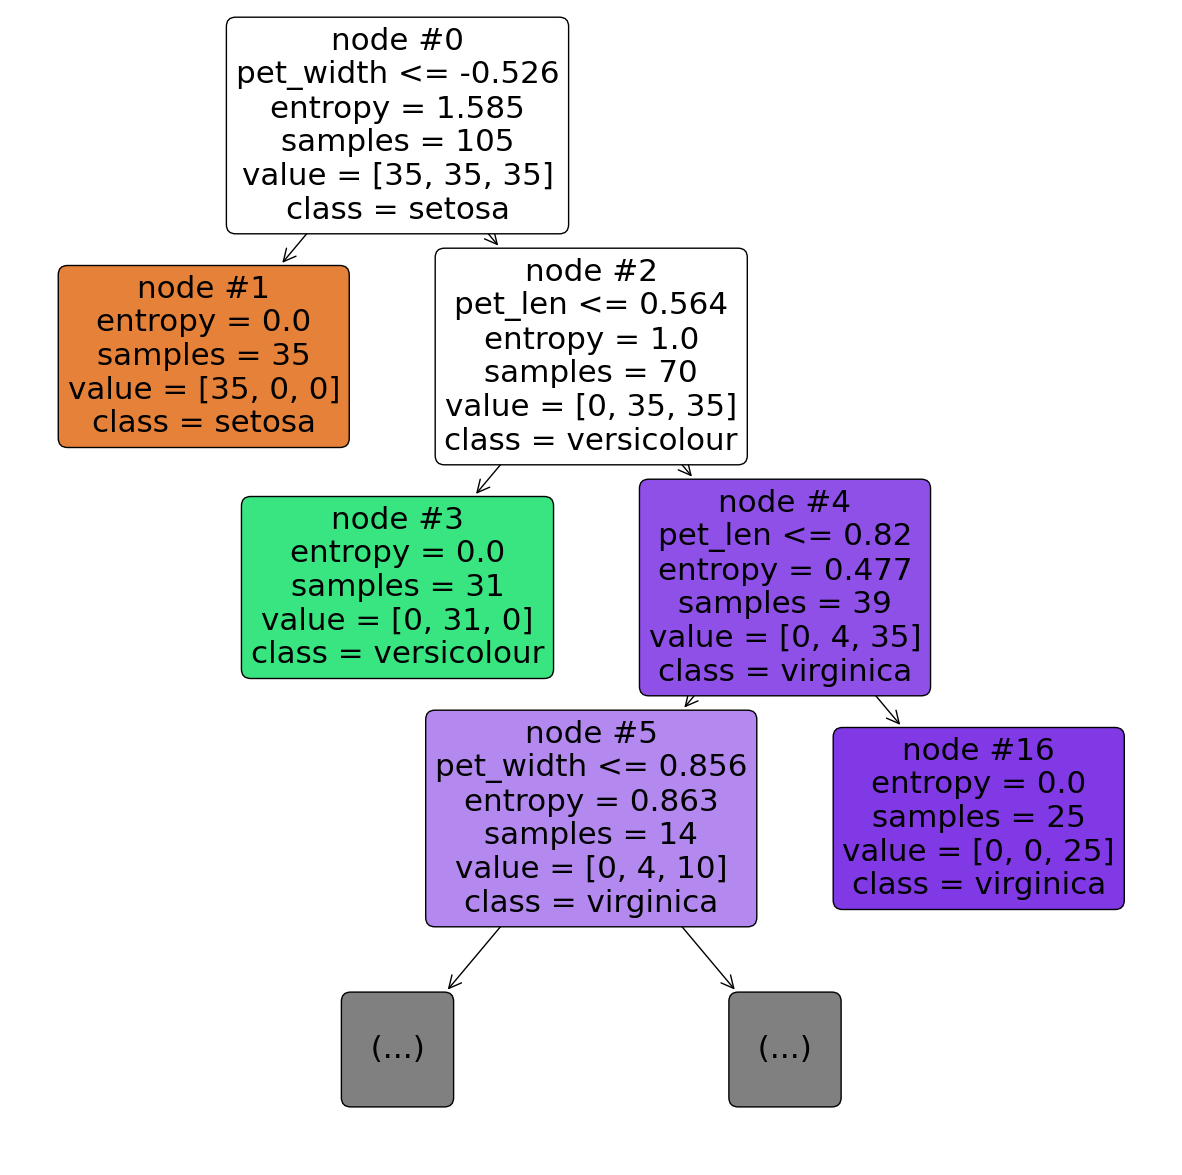

In [32]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

In [33]:
# 5.3 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  # 0.93

0.9777777777777777

In [34]:
# 6.0 Entropy at Node #0 (sample calculations):

[-35/105*np.log2(35/105) - 35/105 * np.log2(35/105) - 35/105 * np.log2(35/105) ]

[1.584962500721156]

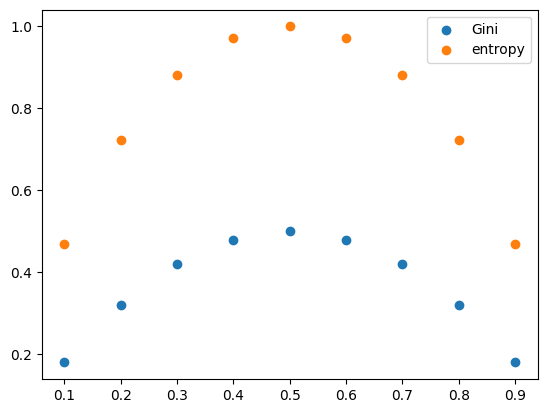

In [35]:
# 7.0 Let us assume our target has two levels.
import matplotlib.pyplot as plt
import numpy as np
# 7.1
gini = []
entropy = []
# 7.2
# i: impurity level
i = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 7.3
for p in i:
  gini.append(1 - p *p - (1-p) * (1-p))
  entropy.append( - p * np.log2(p) - (1-p) * np.log2(1-p) )

# 7.4 Plot both
_=plt.scatter(i,gini, label = "Gini")
_=plt.scatter(i,entropy, label = "entropy")
_=plt.legend()

In [36]:
# 8.0 Which features are important:

fi = ct.feature_importances_
fi

array([0.        , 0.00771665, 0.36456443, 0.62771893])

In [37]:
# 8.1 Get a list of tuples:

list(zip(iris.columns, fi))  # Ist column is the least important

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.007716646530603456),
 ('petal length (cm)', 0.36456442834346947),
 ('petal width (cm)', 0.627718925125927)]

In [38]:
######### Drop 'sepal length (cm)' and repeat above steps #############

# 9. Start modeling
# 9.1 Initialize our decision tree object
ct1 = dtree(
            criterion="gini",    # Alternative 'entropy'
            splitter="best",     # Alternative 'random'
            max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
            )

# 9.2 Train our decision tree
#     Remove column at index: 0

ct1.fit(
        X_train[:,1:],
        y_train
        )

# 9.3 Now make predictions:
out = ct1.predict(X_test[:,1:])
out

DecisionTreeClassifier()

array([2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0,
       0])

In [39]:
# 9.4 Get accuracy
np.sum((out == y_test))/out.size


0.9555555555555556

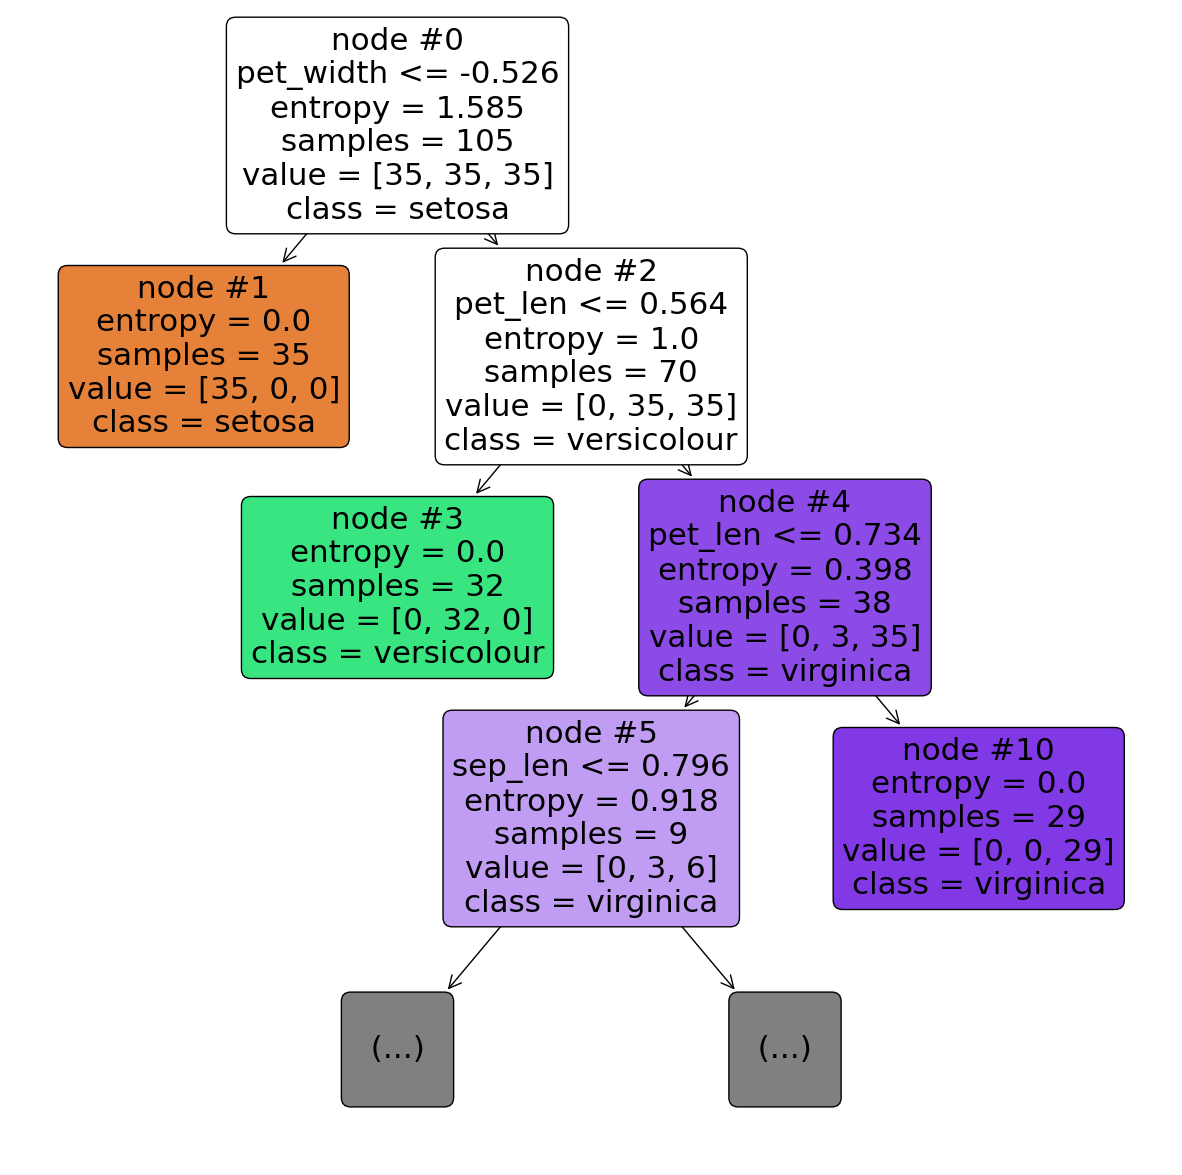

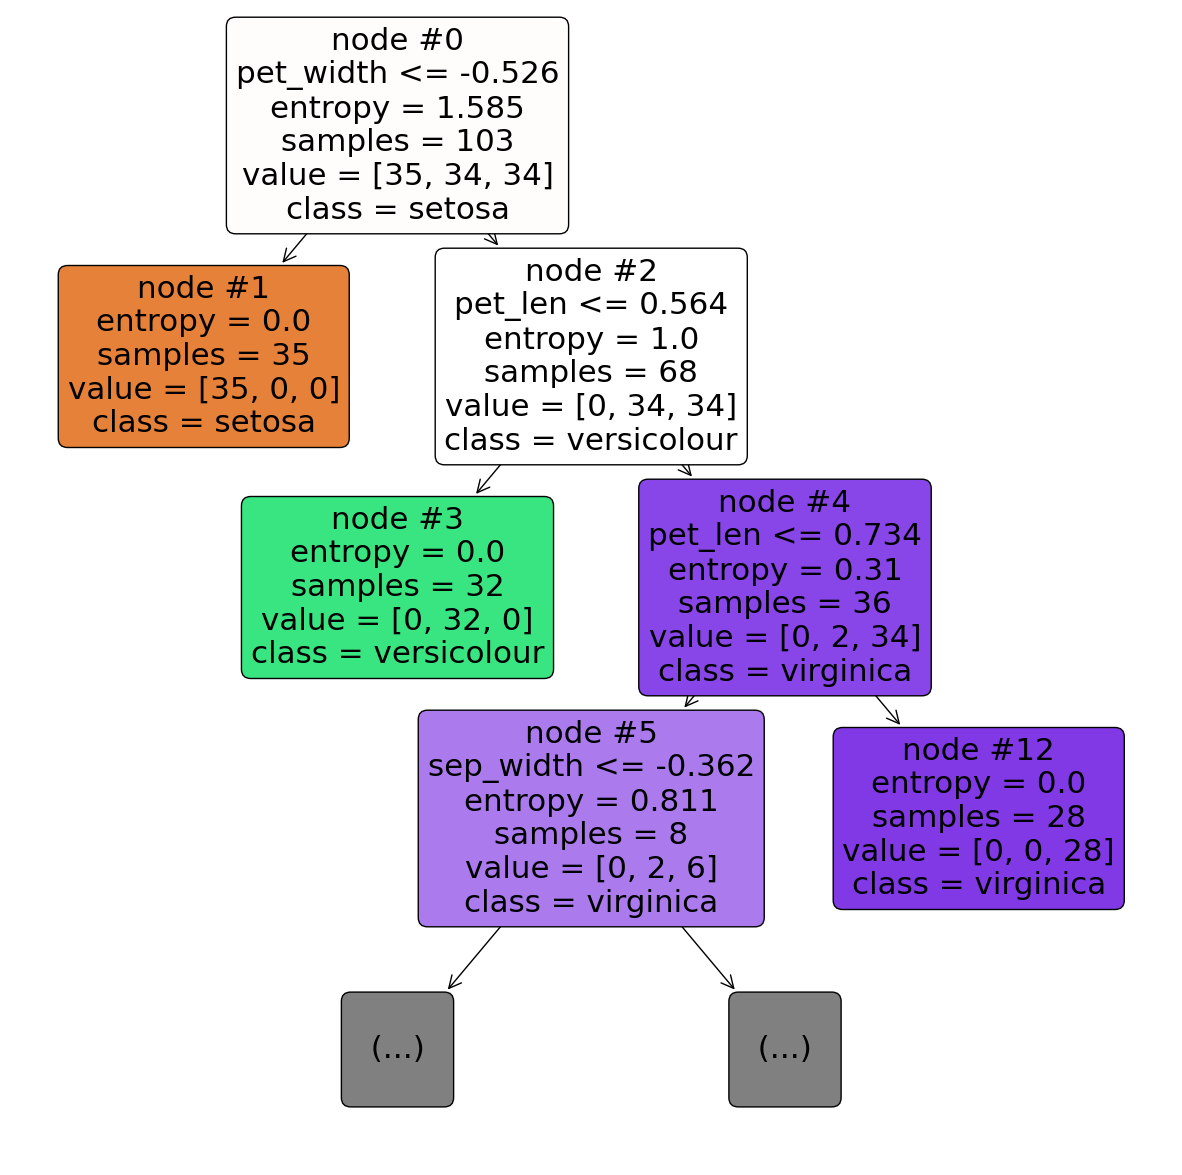

In [40]:
# 8.0 Remove just two rows and decision tree changes:
#     Sensitivity of decision trees to changes in data


#8.1 Decision tree with all rows:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )



ct0 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct0.fit(X_train[:,:],y_train[:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct0,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()



###==================########=================
###==================########=================

#8.2 Decision tree with all rows but two:

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["sep_len", "sep_width","pet_len","pet_width"],
            class_names = ["setosa","versicolour","virginica"]
            )

_=plt.show()

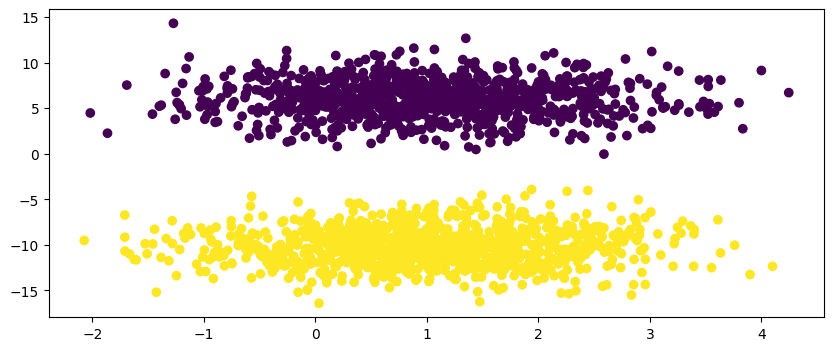

In [41]:
# 8.3 Generate some data:
def_rng = np.random.default_rng()
df = def_rng.multivariate_normal(
                                  mean = [1,6],
                                  cov =  [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                  size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,0.0],
                                          [0.0,4.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

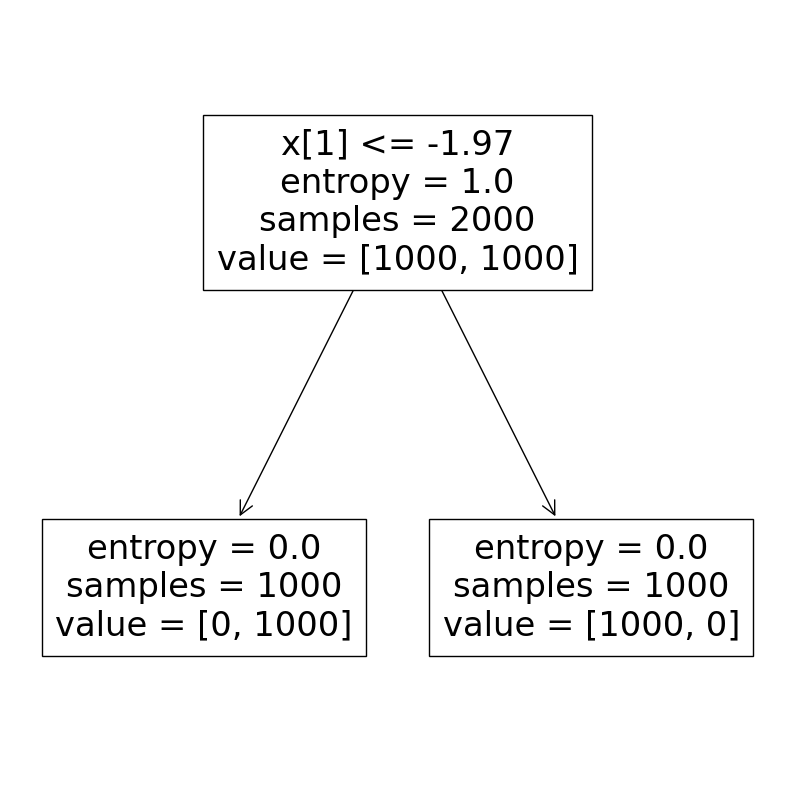

In [42]:
# 8.4 Draw a decison tree for above data
#     It is a very simple tree. Naturally
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

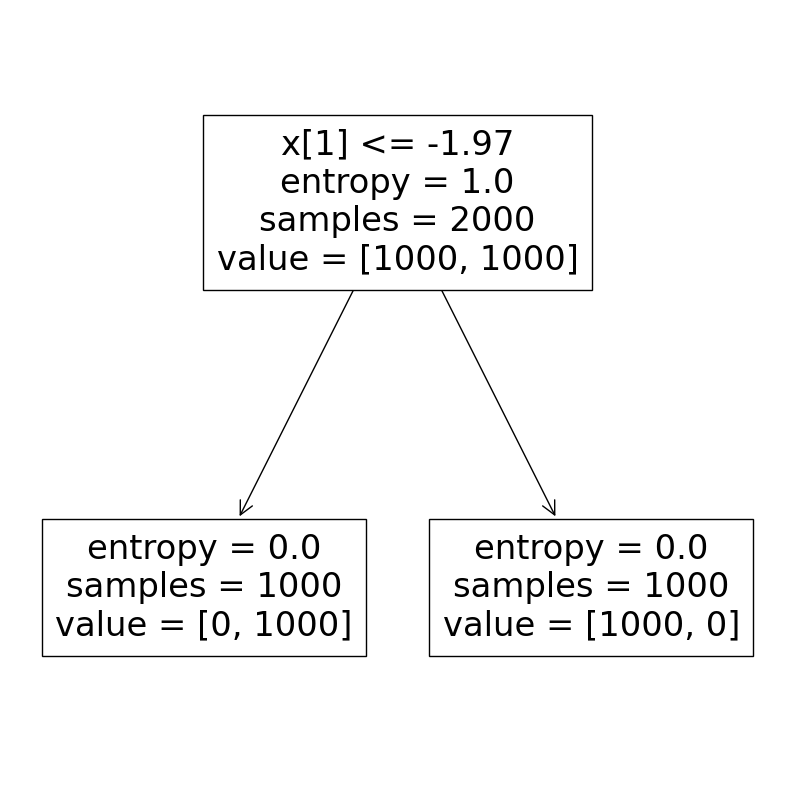

In [43]:
# 8.6 Draw a decison tree for above data
#     Tree becomes very complex
#     Even though there is a simple
#     inclined stratight-line that separates
#     the two clusters:
ct = dtree(criterion='entropy')
_=ct.fit(dfx,target)
_=plt.figure(figsize = (10,10))
_=plot_tree(ct, max_depth=2)

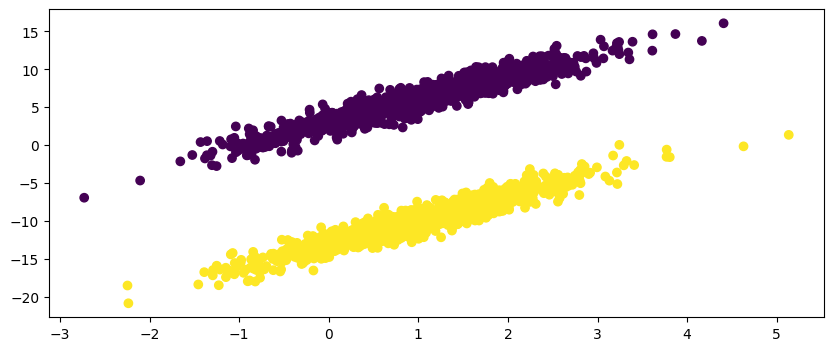

In [44]:
# 9.0 Following two data sources have
#     larger rotation.
df = def_rng.multivariate_normal(
                                 mean = [1,6],
                                 cov = [
                                         [1.0,3.0],  # Change 3.0 to see rotation effect
                                         [3.0,10.0]
                                        ],
                                size = [1000]
                                 )

df1 = def_rng.multivariate_normal(
                                   mean = [1,-10],
                                   cov = [
                                          [1.0,3.0], # Change 3.0 to see rotation effect
                                          [3.0,10.0]
                                          ],
                                   size = [1000]
                                  )
dfx = np.vstack([df,df1])
target = [0]*1000 + [1]*1000
_=plt.figure(figsize = (10,4))
_=plt.scatter(dfx[:,0], dfx[:,1], c = target)

In [45]:
pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 236.3 kB/s eta 0:00:00


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'Stock Close Prices Over Time')

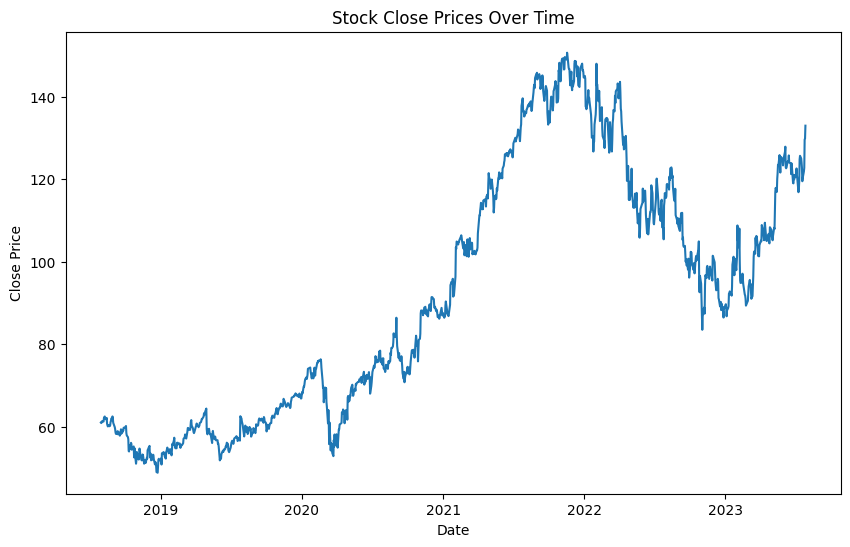

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame with proper column names and date format
# For example:
data = pd.read_csv('/gdrive/MyDrive/bdda1 (1)/bdda1/archive (6)/GOOG.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices Over Time')
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'Closing Prices Over Time')

(array([17532., 17897., 18262., 18628., 18993., 19358.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

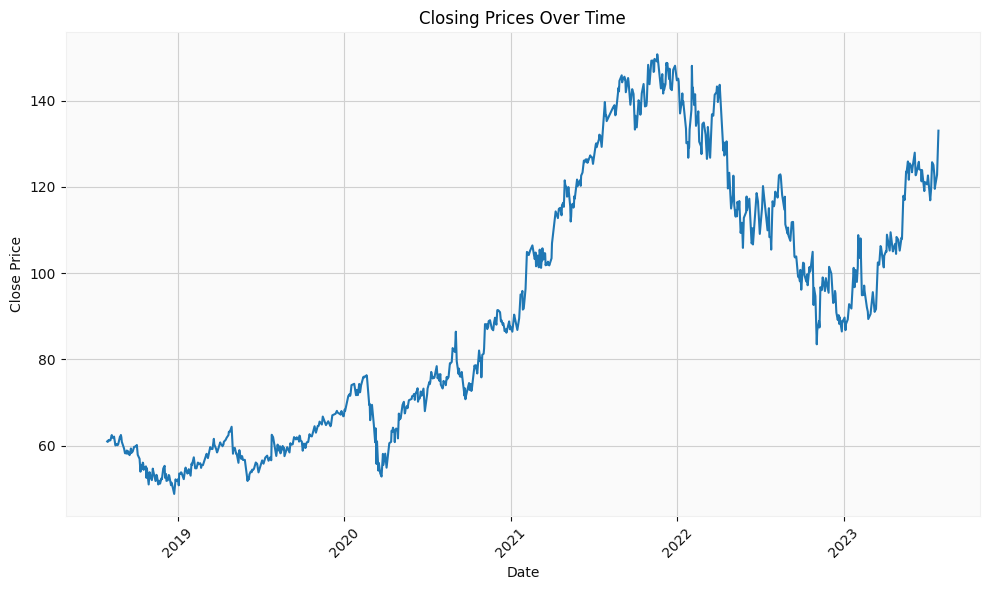

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-51-8a38873d650e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Date'] = pd.to_datetime(ohlc['Date'])
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


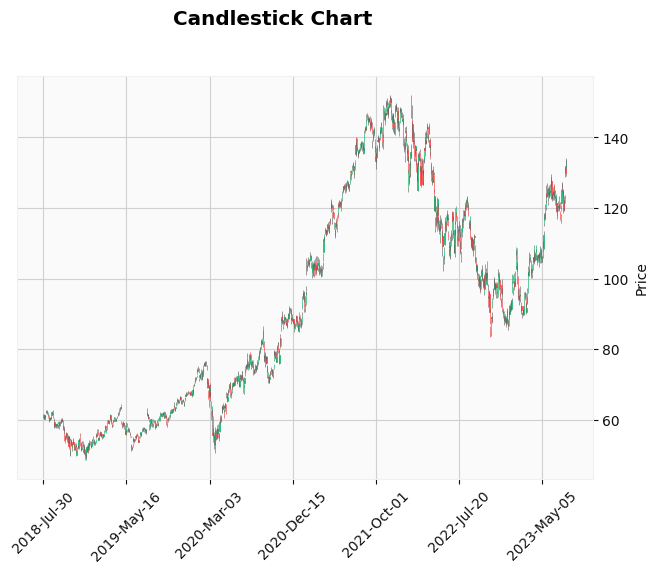

In [51]:
import mplfinance as mpf

ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc.set_index('Date', inplace=True)

mpf.plot(ohlc, type='candle', style='yahoo', title='Candlestick Chart')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Month'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Volume')

Text(0.5, 1.0, 'Monthly Average Trading Volume')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '2018-07'),
  Text(1, 0, '2018-08'),
  Text(2, 0, '2018-09'),
  Text(3, 0, '2018-10'),
  Text(4, 0, '2018-11'),
  Text(5, 0, '2018-12'),
  Text(6, 0, '2019-01'),
  Text(7, 0, '2019-02'),
  Text(8, 0, '2019-03'),
  Text(9, 0, '2019-04'),
  Text(10, 0, '2019-05'),
  Text(11, 0, '2019-06'),
  Text(12, 0, '2019-07'),
  Text(13, 0, '2019-08'),
  Text(14, 0, '2019-09'),
  Text(15, 0, '2019-10'),
  Text(16, 0, '2019-11'),
  Text(17, 0, '2019-12'),
  Text(18, 0, '2020-01'),
  Text(19, 0, '2020-02'),
  Text(20, 0, '2020-03'),
  Text(21, 0, '2020-04'),
  Text(22, 0, '2020-05'),
  Text(23, 0, '2020-06'),
  Text(24, 0, '2020-07'),
  Text(25, 0, '2020-08'),
  Text(26, 0, '2020-09'),
  Text(27, 0, '2020-10'),
  Te

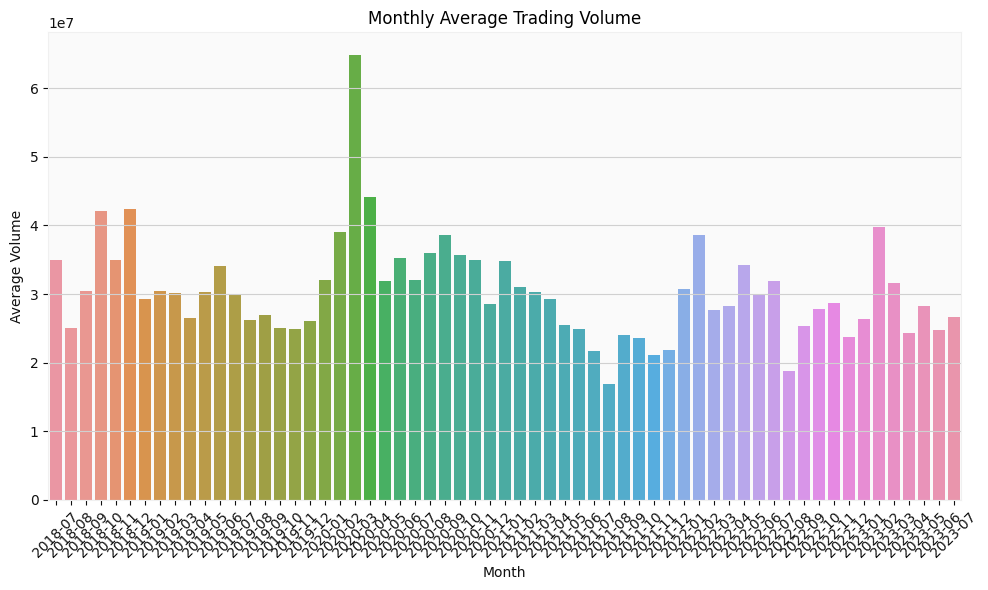

In [52]:
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')
average_volume = data.groupby('Month')['Volume'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_volume.index, y=average_volume.values)
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.title('Monthly Average Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Open Price')

Text(0, 0.5, 'Close Price')

Text(0.5, 1.0, 'Open vs Close Price')

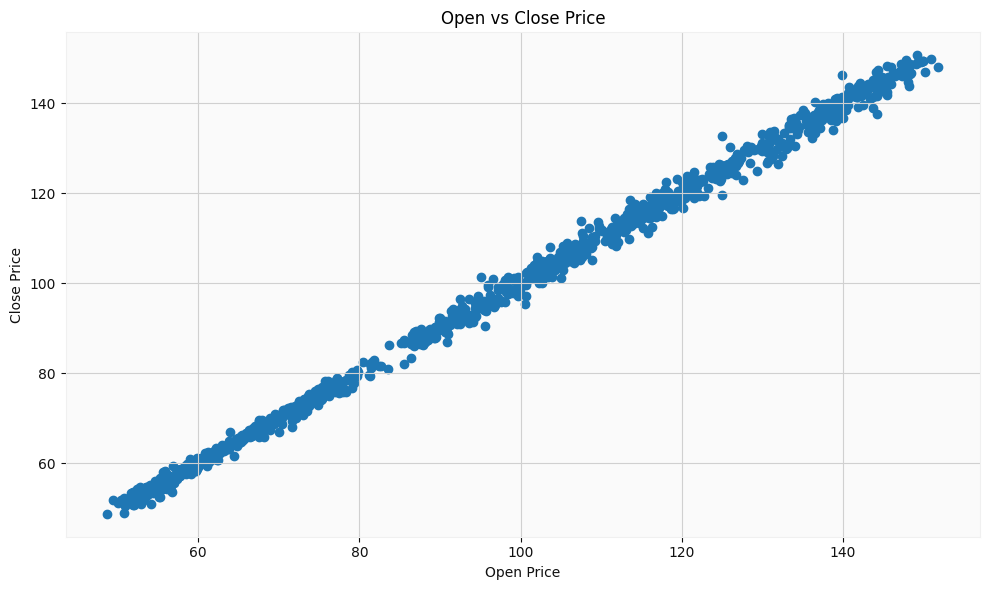

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Close', ylabel='Count'>

Text(0.5, 0, 'Close Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Closing Prices')

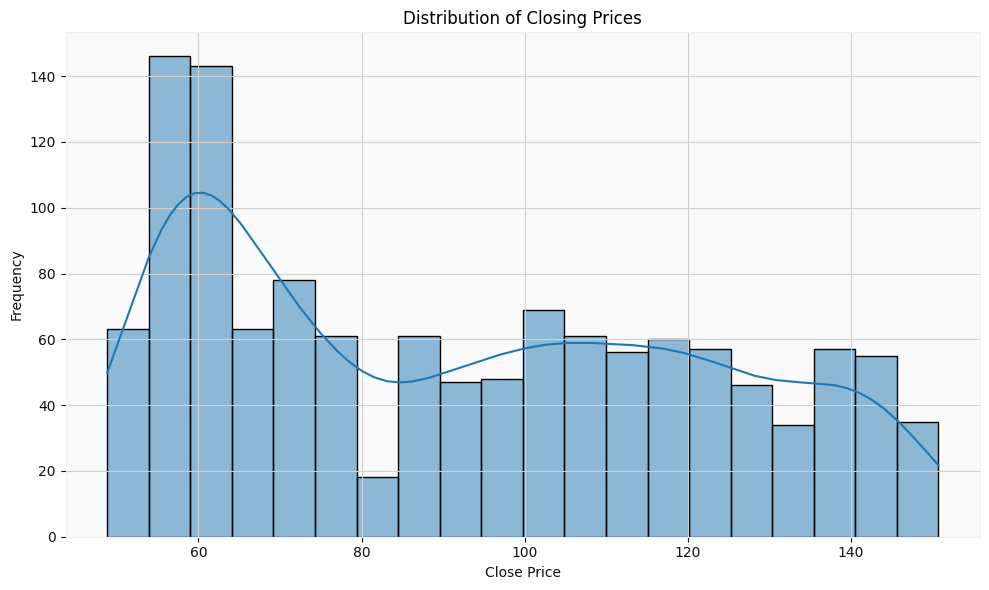

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=20, kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Box Plot of High and Low Prices')

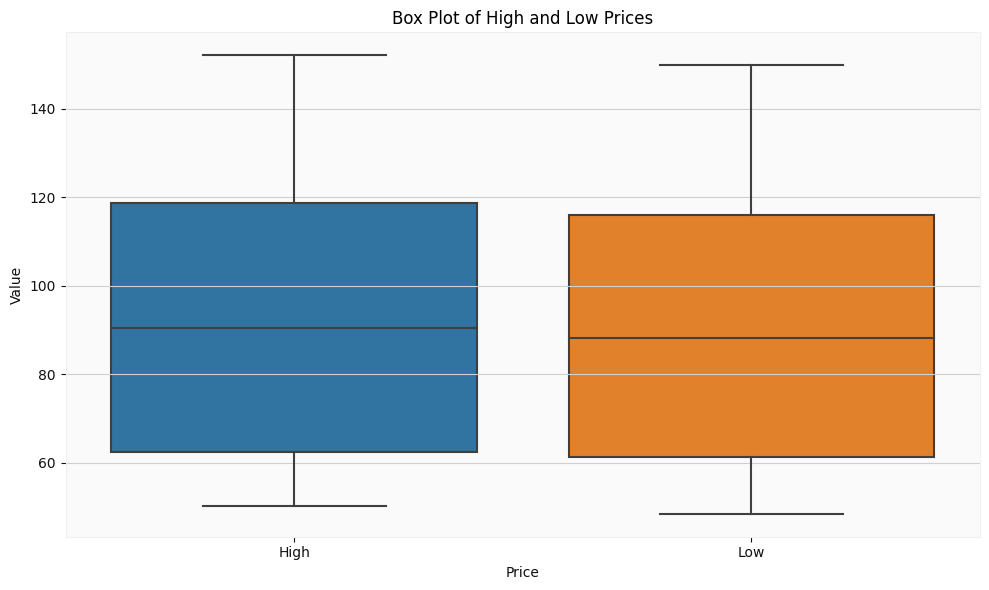

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['High', 'Low']])
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Box Plot of High and Low Prices')
plt.tight_layout()
plt.show()

#Objectives:
# To improve model complexity to capture underlying patterns and enhance predictive performance.
# To reduce complexity for enhancing generalization and prevent performance degradation.
# To optimize decision tree parameters to minimize Mean Absolute Error (MAE) on validation data.
# Develop a decision tree regressor model with adjustable leaf nodes for improved prediction accuracy.
# Calculate and return MAE to assess the performance of the decision tree regression model.
# Evaluating the impact on model's performance

#Managerial Implications
#1. For a manager, its crucial to choose a model that captures patterns without over complicating.
#2. Opting for a model that can be useful across diverse market scenarios, avoiding situations of underfitting or overfitting.
#3. Essential to enhance precision by fine tuning model parameters like leaf nodes
#4. Need for creating a flexible model that can adapt to market dynamics
#5. Employing of MAE to analyze how the model is predicting
#6. Regularly updating the model as per changing scenario.

#CONCLUSION

#Striking the right balance between model complexity and simplicity is key to capturing meaningful patterns in stock data, ensuring accurate predictions without unnecessary intricacies.

#A versatile model capable of generalizing well across various market conditions is essential to prevent both underfitting, which misses patterns, and overfitting, which learns noise.

#Precision can be significantly enhanced by fine-tuning model parameters, such as adjusting leaf nodes in a decision tree, to minimize errors in stock price predictions.

#Developing a flexible model with adjustable nodes allows for effective adaptation to dynamic market changes, ensuring relevance and accuracy over time.

#The Mean Absolute Error (MAE) serves as a valuable tool for managers to assess the model's prediction accuracy, enabling informed decision-making in stock trading.

#Continuously updating the model based on changing market scenarios is imperative to maintain its effectiveness and alignment with real-world conditions, leading to consistently improved performance.

#Incorporating these objectives and following the suggested managerial implications will empower managers to make more informed investment decisions, leveraging predictive models that capture stock market dynamics accurately while remaining adaptable to evolving trends.